### AGENTIC AI PERFORMANCE : EDGE VS  CLOUD : CAN AI AGENT PERFORMANCE BE PREDICTED BY DEPLOYMENT ARCHITECTURE ?

In [1]:
 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# step 1 : laod dataset 
df = pd.read_csv('C:/Users/User/Downloads/agentic_ai_performance_dataset_20250622.csv')

In [4]:
#step 2 : data preprocessing
df.drop(columns=["agent_id","timestamp"], inplace = True)

In [11]:
# convert boolean string columns to binary 
bool_cols = ['human_intervention_required','multimodal_capability','edge_compatibility','privacy_compliance_score','bias_detection_score']
df[bool_cols] = df[bool_cols].astype(str).apply(lambda col: col.str.upper().replace({'TRUE': 1, 'FALSE': 0}))



C:\Users\User\AppData\Local\Temp\ipykernel_16928\1982132037.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bool_cols] = df[bool_cols].astype(str).apply(lambda col: col.str.upper().replace({'TRUE': 1, 'FALSE': 0}))


In [12]:
# step 3 : define features and target variable
X = df.drop(columns=["edge_compatibility"])
y = df["edge_compatibility"]


In [13]:
# identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [16]:
#step 4 : create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_pipeline, categorical_features)     
])

In [17]:
# step 5 : Full classification pipeline 
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [18]:
#step 6 : train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
#step 7 : train the model 
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['task_complexity',
                                                   'autonomy_level',
                                                   'success_rate',
                                                   'accuracy_score',
                                                   'efficiency_score',
                                                   'execution_time_seconds',
                                                   'response_latency_ms',
                                                   'memory_usage_mb',
                                                   'cpu_usage_percent',
                                                   'cost_per_task_cents',
                                                   'human_inte...
                                                   'cost_efficiency_ratio',
                                                   'autonomous_capability_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['agent_type',
                                                   'model_architecture',
                                                   'deployment_environment',
                                                   'task_category',
                                                   'privacy_compliance_score',
                                                   'bias_detection_score'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [20]:
#step 8 :predict and evaluate
y_pred = pipeline.predict(X_test)

print("=====CLASSIFICATION REPORT=====")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

=====CLASSIFICATION REPORT=====
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       475
           1       0.95      0.66      0.78       525

    accuracy                           0.81      1000
   macro avg       0.84      0.81      0.80      1000
weighted avg       0.84      0.81      0.80      1000


Accuracy: 0.806


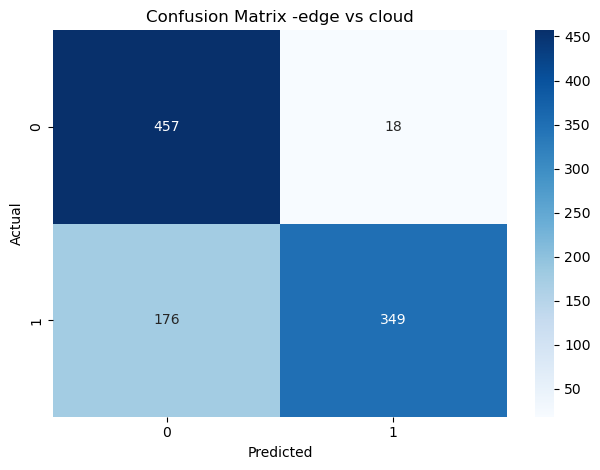

In [21]:
#step 9 : confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix -edge vs cloud")
plt.tight_layout()
plt.show()